# Support Vector Machines (SVM): Теория и практика

## Теория

### Что такое SVM?

Support Vector Machine (Метод опорных векторов) — это мощный алгоритм машинного обучения для задач классификации и регрессии. Основная идея SVM — найти оптимальную гиперплоскость, которая максимально разделяет классы.

### Линейный SVM

Для линейно разделимых данных SVM ищет гиперплоскость:
$$
w^T x + b = 0
$$

Где:
- $w$ — вектор весов (перпендикулярен гиперплоскости)
- $b$ — смещение (bias)
- $x$ — вектор признаков

### Margin (Зазор)

Расстояние от гиперплоскости до ближайших точек каждого класса называется **margin**. SVM максимизирует этот зазор.

Margin вычисляется как:
$$
\text{margin} = \frac{2}{\|w\|}
$$

### Целевая функция

SVM решает задачу оптимизации:
$$
\min_{w,b} \frac{1}{2}\|w\|^2
$$

При ограничениях:
$$
y_i(w^T x_i + b) \geq 1, \quad \forall i
$$

Где $y_i \in \{-1, +1\}$ — метки классов.

### Soft Margin SVM

Для данных, которые не являются линейно разделимыми, используется **soft margin** с введением переменных ослабления $\xi_i$:

$$
\min_{w,b,\xi} \frac{1}{2}\|w\|^2 + C\sum_{i=1}^{n}\xi_i
$$

При ограничениях:
$$
y_i(w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$

Где:
- $C$ — параметр регуляризации (баланс между максимизацией margin и минимизацией ошибок)
- $\xi_i$ — величина нарушения для точки $i$

### Kernel Trick (Ядро)

Для нелинейно разделимых данных SVM использует **ядра** (kernels), которые отображают данные в пространство более высокой размерности:

1. **Линейное ядро**: $K(x_i, x_j) = x_i^T x_j$
2. **Полиномиальное ядро**: $K(x_i, x_j) = (x_i^T x_j + c)^d$
3. **RBF (Radial Basis Function)**: $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$
4. **Sigmoid**: $K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)$

### Опорные векторы

**Опорные векторы** (support vectors) — это точки обучающей выборки, которые лежат на границах margin или нарушают его. Только эти точки влияют на положение разделяющей гиперплоскости.

## Практика: Линейный SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Генерация линейно разделимых данных
np.random.seed(42)
X, y = datasets.make_classification(n_samples=200, n_features=2, n_redundant=0, 
                                      n_informative=2, n_clusters_per_class=1, 
                                      class_sep=2, random_state=42)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение линейного SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train_scaled, y_train)

# Предсказания
y_pred = svm_linear.predict(X_test_scaled)

# Метрики
print("Линейный SVM")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Линейный SVM
Accuracy: 0.9833333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        26

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60


Confusion Matrix:
[[34  0]
 [ 1 25]]


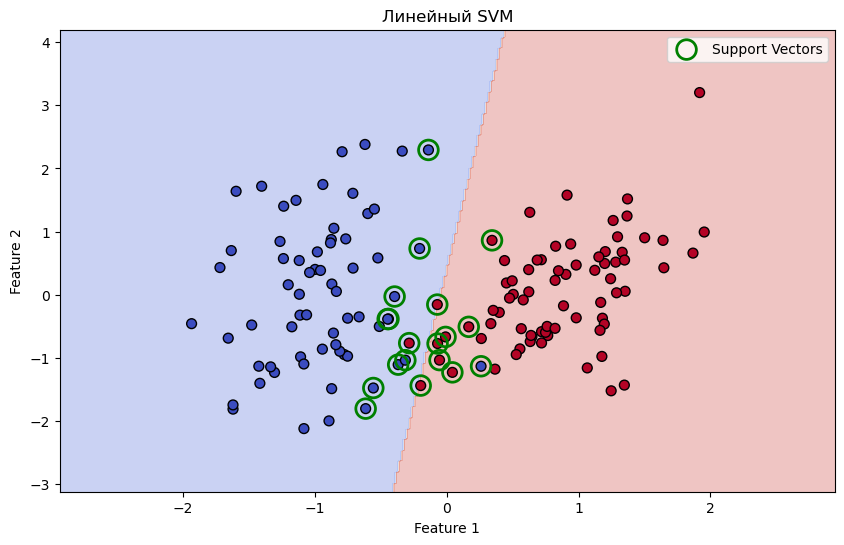

In [2]:
# Визуализация разделяющей гиперплоскости и опорных векторов
def plot_svm_decision_boundary(X, y, model, title):
    plt.figure(figsize=(10, 6))
    
    # Создание сетки для визуализации
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Предсказания на сетке
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Отображение границы решения
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
    
    # Опорные векторы
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=200, linewidth=2, facecolors='none', edgecolors='green', label='Support Vectors')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_svm_decision_boundary(X_train_scaled, y_train, svm_linear, 'Линейный SVM')

## Практика: SVM с RBF ядром

In [3]:
# Генерация нелинейно разделимых данных
X_nonlinear, y_nonlinear = datasets.make_moons(n_samples=200, noise=0.15, random_state=42)

# Разделение данных
X_train_nl, X_test_nl, y_train_nl, y_test_nl = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.3, random_state=42)

# Стандартизация
X_train_nl_scaled = scaler.fit_transform(X_train_nl)
X_test_nl_scaled = scaler.transform(X_test_nl)

# Обучение SVM с RBF ядром
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train_nl_scaled, y_train_nl)

# Предсказания
y_pred_nl = svm_rbf.predict(X_test_nl_scaled)

# Метрики
print("SVM с RBF ядром")
print("Accuracy:", accuracy_score(y_test_nl, y_pred_nl))
print("\nClassification Report:")
print(classification_report(y_test_nl, y_pred_nl))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_nl, y_pred_nl))

SVM с RBF ядром
Accuracy: 0.9833333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.96      0.98        28

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60


Confusion Matrix:
[[32  0]
 [ 1 27]]


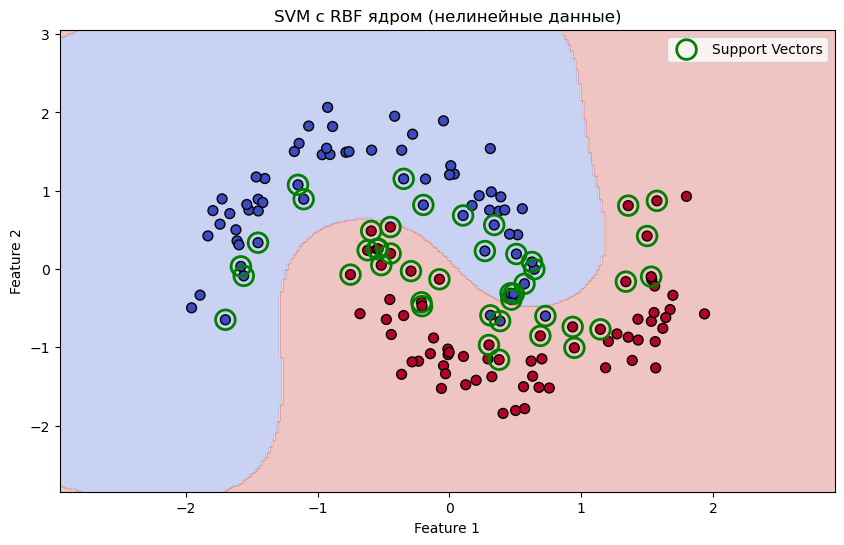

In [4]:
plot_svm_decision_boundary(X_train_nl_scaled, y_train_nl, svm_rbf, 'SVM с RBF ядром (нелинейные данные)')

## Сравнение различных ядер

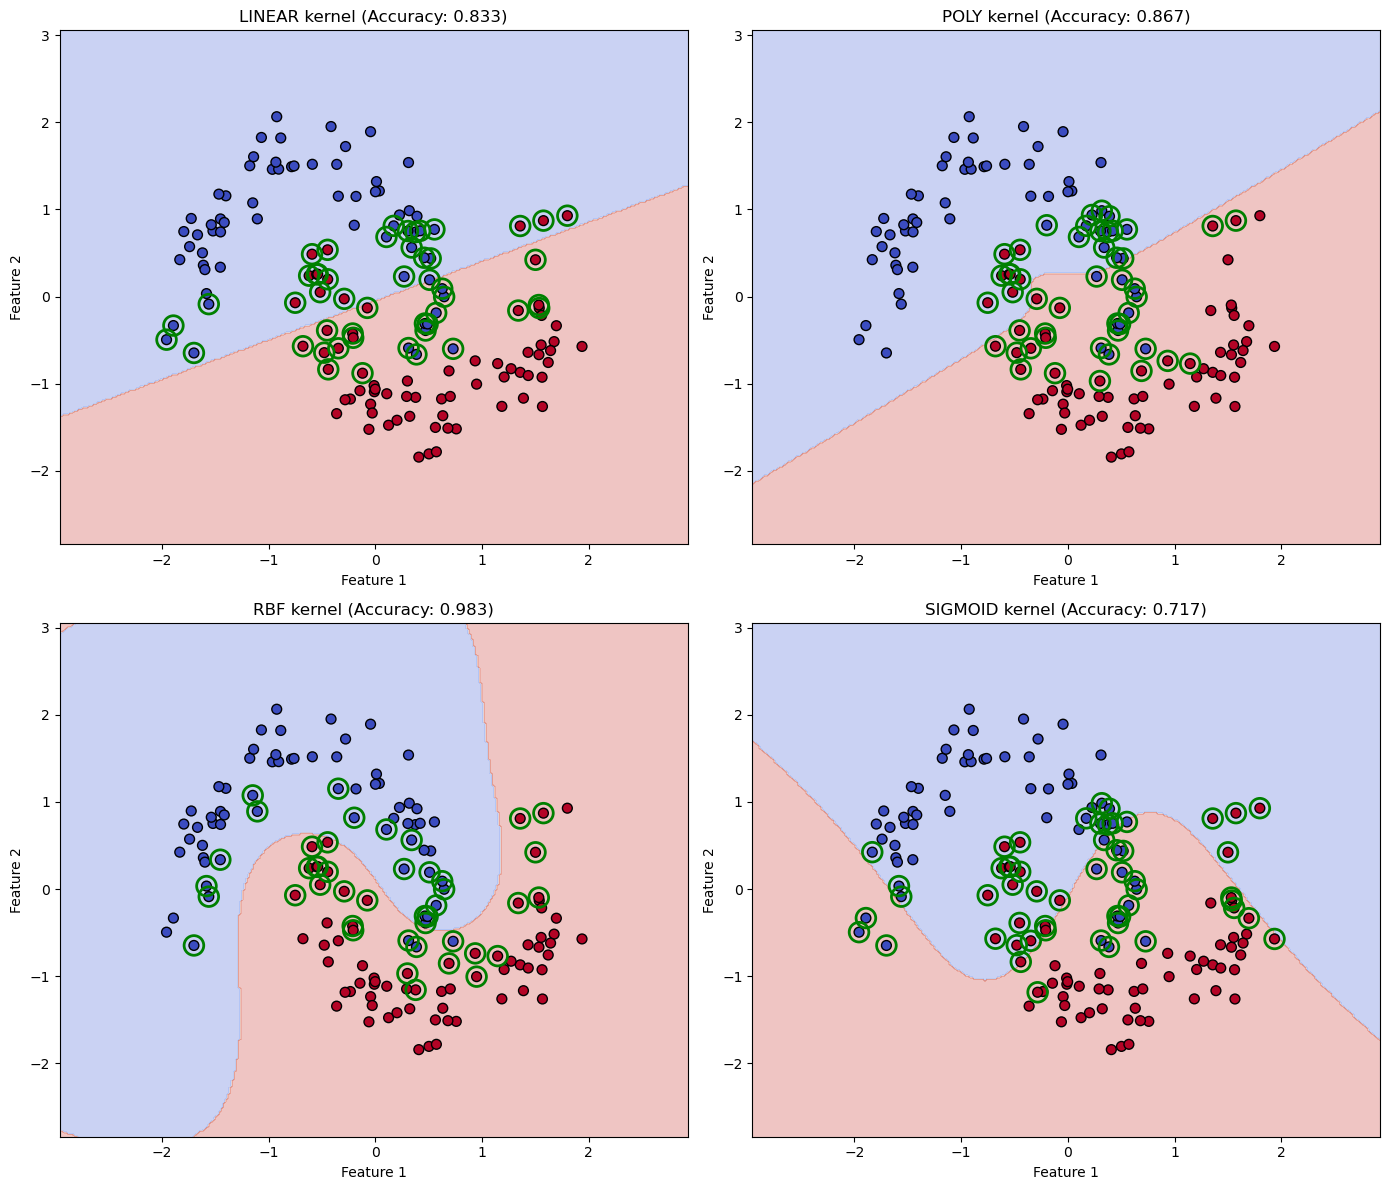

In [5]:
# Сравнение разных ядер на нелинейных данных
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, kernel in enumerate(kernels):
    # Обучение модели
    if kernel == 'poly':
        model = SVC(kernel=kernel, degree=3, C=1.0)
    else:
        model = SVC(kernel=kernel, C=1.0)
    
    model.fit(X_train_nl_scaled, y_train_nl)
    
    # Создание сетки
    h = 0.02
    x_min, x_max = X_train_nl_scaled[:, 0].min() - 1, X_train_nl_scaled[:, 0].max() + 1
    y_min, y_max = X_train_nl_scaled[:, 1].min() - 1, X_train_nl_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Визуализация
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    axes[idx].scatter(X_train_nl_scaled[:, 0], X_train_nl_scaled[:, 1], 
                      c=y_train_nl, cmap='coolwarm', edgecolor='k', s=50)
    axes[idx].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                      s=200, linewidth=2, facecolors='none', edgecolors='green')
    
    # Метрики
    y_pred_kernel = model.predict(X_test_nl_scaled)
    acc = accuracy_score(y_test_nl, y_pred_kernel)
    
    axes[idx].set_title(f'{kernel.upper()} kernel (Accuracy: {acc:.3f})')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## Влияние параметра C

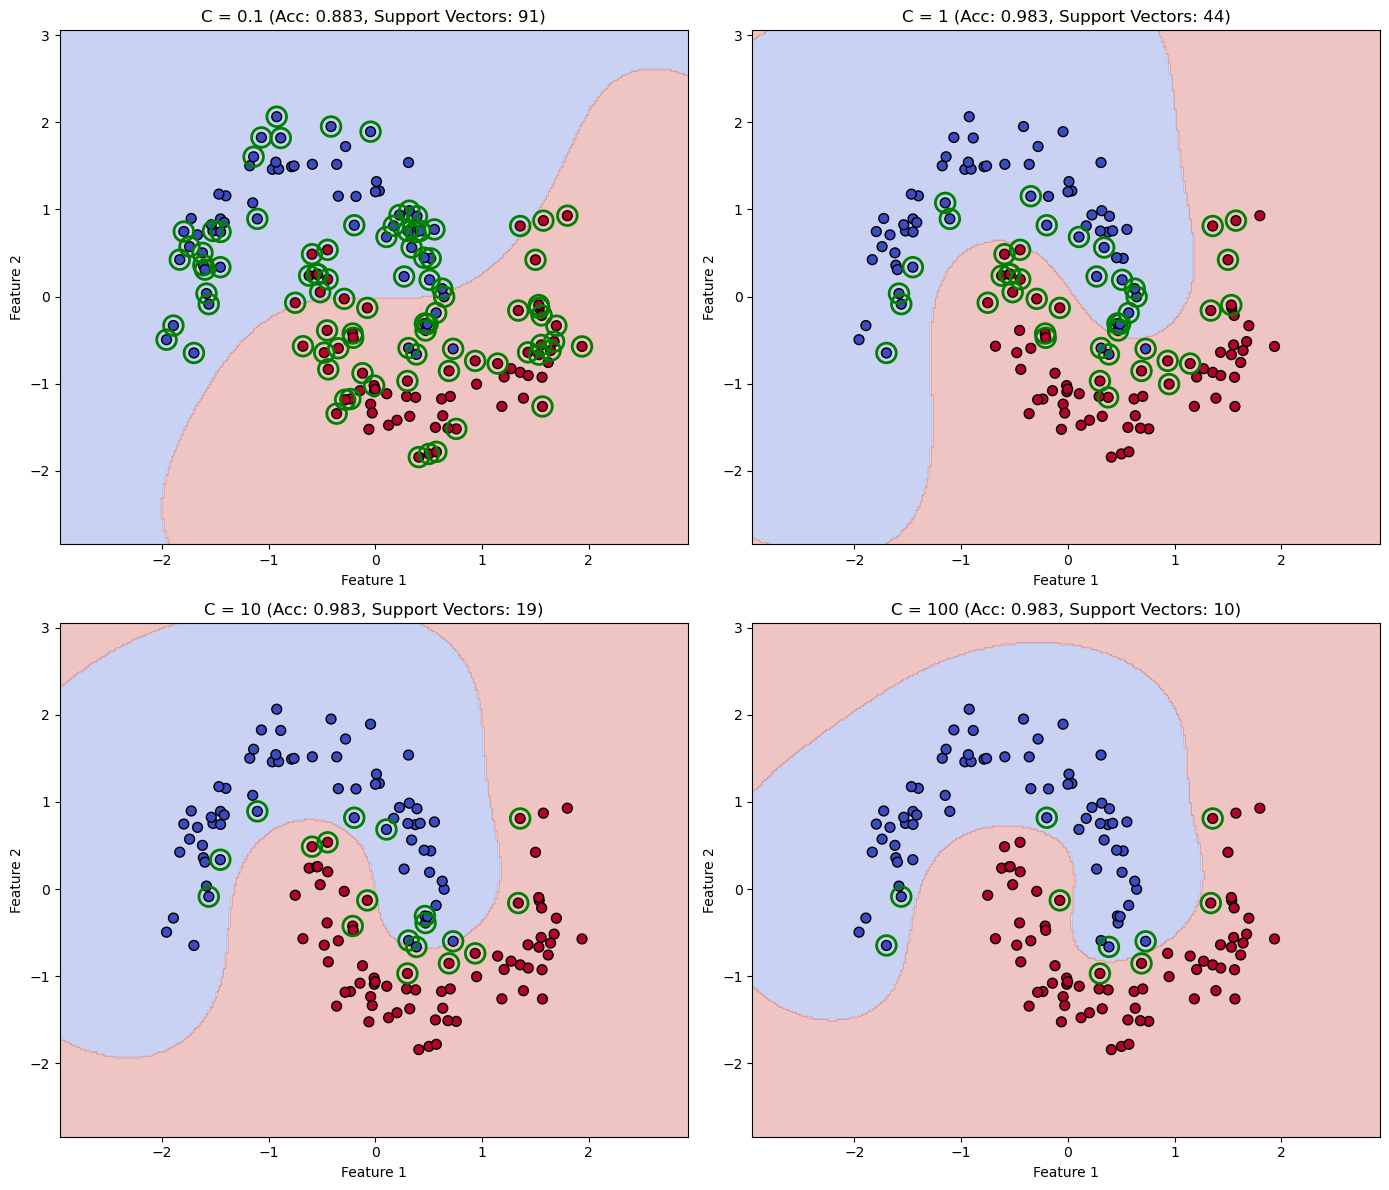


Влияние параметра C:
- Малое C: больше margin, больше опорных векторов, больше ошибок (underfitting)
- Большое C: меньше margin, меньше опорных векторов, меньше ошибок (overfitting)


In [6]:
# Сравнение разных значений параметра C
C_values = [0.1, 1, 10, 100]
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, C in enumerate(C_values):
    model = SVC(kernel='rbf', C=C, gamma='scale')
    model.fit(X_train_nl_scaled, y_train_nl)
    
    # Создание сетки
    h = 0.02
    x_min, x_max = X_train_nl_scaled[:, 0].min() - 1, X_train_nl_scaled[:, 0].max() + 1
    y_min, y_max = X_train_nl_scaled[:, 1].min() - 1, X_train_nl_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Визуализация
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    axes[idx].scatter(X_train_nl_scaled[:, 0], X_train_nl_scaled[:, 1], 
                      c=y_train_nl, cmap='coolwarm', edgecolor='k', s=50)
    axes[idx].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                      s=200, linewidth=2, facecolors='none', edgecolors='green')
    
    y_pred_c = model.predict(X_test_nl_scaled)
    acc = accuracy_score(y_test_nl, y_pred_c)
    n_support = len(model.support_vectors_)
    
    axes[idx].set_title(f'C = {C} (Acc: {acc:.3f}, Support Vectors: {n_support})')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("\nВлияние параметра C:")
print("- Малое C: больше margin, больше опорных векторов, больше ошибок (underfitting)")
print("- Большое C: меньше margin, меньше опорных векторов, меньше ошибок (overfitting)")

## Влияние параметра gamma (для RBF ядра)

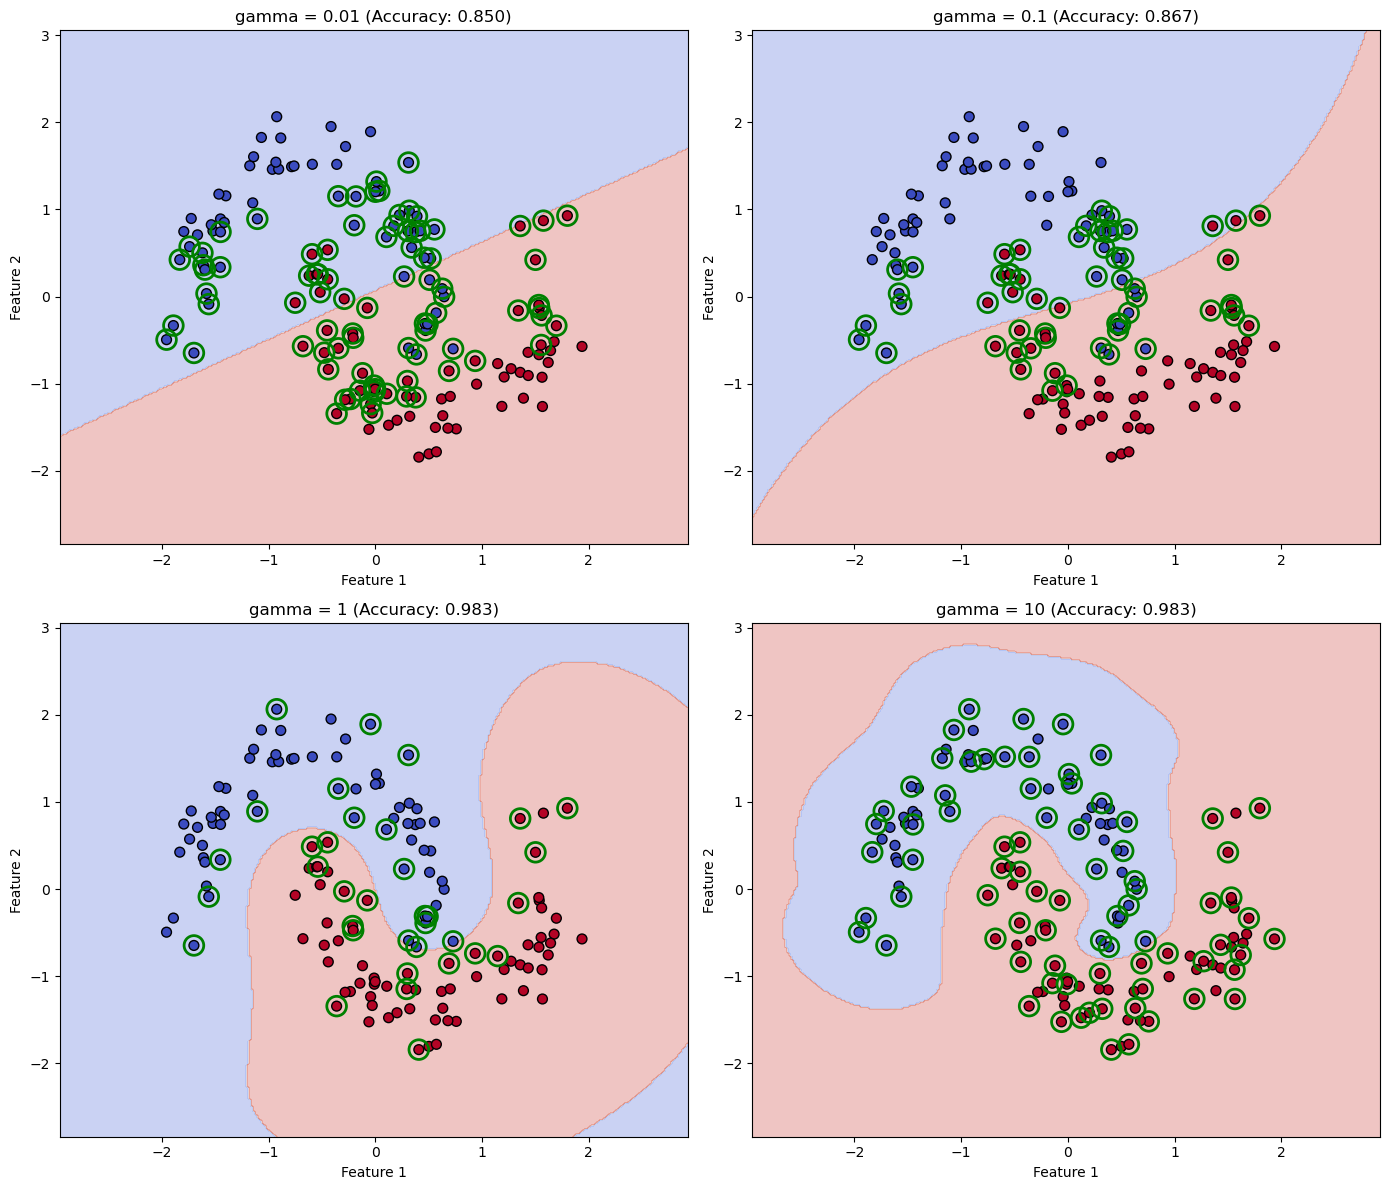


Влияние параметра gamma:
- Малое gamma: широкая область влияния, более гладкая граница (underfitting)
- Большое gamma: узкая область влияния, сложная граница (overfitting)


In [7]:
# Сравнение разных значений gamma
gamma_values = [0.01, 0.1, 1, 10]
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, gamma in enumerate(gamma_values):
    model = SVC(kernel='rbf', C=1.0, gamma=gamma)
    model.fit(X_train_nl_scaled, y_train_nl)
    
    # Создание сетки
    h = 0.02
    x_min, x_max = X_train_nl_scaled[:, 0].min() - 1, X_train_nl_scaled[:, 0].max() + 1
    y_min, y_max = X_train_nl_scaled[:, 1].min() - 1, X_train_nl_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Визуализация
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    axes[idx].scatter(X_train_nl_scaled[:, 0], X_train_nl_scaled[:, 1], 
                      c=y_train_nl, cmap='coolwarm', edgecolor='k', s=50)
    axes[idx].scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                      s=200, linewidth=2, facecolors='none', edgecolors='green')
    
    y_pred_gamma = model.predict(X_test_nl_scaled)
    acc = accuracy_score(y_test_nl, y_pred_gamma)
    
    axes[idx].set_title(f'gamma = {gamma} (Accuracy: {acc:.3f})')
    axes[idx].set_xlabel('Feature 1')
    axes[idx].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("\nВлияние параметра gamma:")
print("- Малое gamma: широкая область влияния, более гладкая граница (underfitting)")
print("- Большое gamma: узкая область влияния, сложная граница (overfitting)")

## Практическое применение: классификация на реальных данных

In [ ]:
# Загрузка датасета Iris
from sklearn.datasets import load_iris

iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Используем только два класса для бинарной классификации
X_iris_binary = X_iris[y_iris != 2]
y_iris_binary = y_iris[y_iris != 2]

# Разделение данных
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris_binary, y_iris_binary, test_size=0.3, random_state=42)

# Стандартизация
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

# Обучение SVM
svm_iris = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_iris.fit(X_train_iris_scaled, y_train_iris)

# Предсказания
y_pred_iris = svm_iris.predict(X_test_iris_scaled)

# Метрики
print("SVM на датасете Iris (бинарная классификация)")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_iris))
print("\nClassification Report:")
print(classification_report(y_test_iris, y_pred_iris, target_names=iris.target_names[:2]))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_iris, y_pred_iris))
print("\nКоличество опорных векторов:", len(svm_iris.support_vectors_))

SVM на датасете Iris (бинарная классификация)
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[17  0]
 [ 0 13]]

Количество опорных векторов: 12


## Резюме

### Преимущества SVM:
1. Эффективен в пространствах высокой размерности
2. Работает хорошо даже когда признаков больше, чем объектов
3. Использует только опорные векторы (экономия памяти)
4. Универсален благодаря различным ядрам

### Недостатки SVM:
1. Медленное обучение на больших датасетах
2. Чувствителен к выбору ядра и параметров
3. Не предоставляет напрямую оценки вероятности
4. Сложно интерпретировать модель

### Ключевые параметры:
- **C**: контролирует trade-off между максимизацией margin и минимизацией ошибок
- **gamma** (для RBF): определяет, насколько далеко влияет один обучающий пример
- **kernel**: тип ядра (linear, poly, rbf, sigmoid)